In [163]:
import pandas as pd

In [164]:
all_data = pd.read_csv("./data/house/all_transformed.csv")

In [165]:
ntrain = 1460

train = all_data[:ntrain]
test = all_data[ntrain:]

In [174]:
y_train = pd.read_csv("./data/house/train.csv")['SalePrice']
y_train = np.log(y_train)

In [186]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn import metrics
# import xgboost as xgb
import lightgbm as lgb

In [207]:
std_x = StandardScaler()
std_x.fit(train.values)
x_scaled = std_x.transform(train.values)


In [208]:
lr = Lasso(alpha =0.0001, random_state=10)
lr.fit(x_scaled,y_train)
y_predict = lr.predict(x_scaled)
metrics.mean_absolute_error(np.exp(y_train),np.exp(y_predict))

12107.274402267465

In [203]:
metrics.mean_absolute_error(y_train, y_predict)

0.071001250268073635

In [212]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

In [213]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = np.exp(lr.predict(std_x.transform(test.values)))
sub.to_csv('submission.csv',index=False)

# Use NN

In [226]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras import regularizers

from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from keras import initializers
from keras import optimizers

In [227]:
input_x = Input(shape=(x_scaled.shape[1],))
h1 = Dense(64,activation='linear',
               kernel_regularizer=regularizers.l1(0.005),)(input_x)
dr1 = Dropout(0.05)(h1)
h2 = Dense(64,activation='linear',
               kernel_regularizer=regularizers.l1(0.005))(dr1)
output = Dense(1,activation='linear',
               kernel_regularizer=regularizers.l1(0.005),)(h2)

model = Model(input_x,output)
model.compile(optimizer=optimizers.Adagrad(),
              loss='mean_squared_error',)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 223)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                14336     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 18,561
Trainable params: 18,561
Non-trainable params: 0
_________________________________________________________________


In [228]:
error = model.fit(x_scaled,y_train,
                  batch_size=8,validation_split=0.1,
                  validation_steps=None,epochs=4000,verbose=1)

Train on 1314 samples, validate on 146 samples
Epoch 1/4000
1314/1314 [==============================] - 0s 346us/step - loss: 123.5040 - val_loss: 117.0081
Epoch 2/4000
1314/1314 [==============================] - 0s 140us/step - loss: 64.1992 - val_loss: 412.0288
Epoch 3/4000
1314/1314 [==============================] - 0s 135us/step - loss: 24.5775 - val_loss: 1204.6805
Epoch 4/4000
1314/1314 [==============================] - 0s 137us/step - loss: 11.7967 - val_loss: 1538.0540
Epoch 5/4000
1314/1314 [==============================] - 0s 135us/step - loss: 9.1915 - val_loss: 1546.3427
Epoch 6/4000
1314/1314 [==============================] - 0s 139us/step - loss: 8.7744 - val_loss: 1514.8818
Epoch 7/4000
1314/1314 [==============================] - 0s 134us/step - loss: 8.6584 - val_loss: 1435.6229
Epoch 8/4000
1314/1314 [==============================] - 0s 135us/step - loss: 8.6118 - val_loss: 1356.0275
Epoch 9/4000
1314/1314 [==============================] - 0s 135us/step - loss

Epoch 76/4000
1314/1314 [==============================] - 0s 129us/step - loss: 5.6438 - val_loss: 35.4240
Epoch 77/4000
1314/1314 [==============================] - 0s 128us/step - loss: 5.5770 - val_loss: 33.4176
Epoch 78/4000
1314/1314 [==============================] - 0s 122us/step - loss: 5.6019 - val_loss: 31.7209
Epoch 79/4000
1314/1314 [==============================] - 0s 125us/step - loss: 5.5346 - val_loss: 29.5636
Epoch 80/4000
1314/1314 [==============================] - 0s 122us/step - loss: 5.4944 - val_loss: 27.9480
Epoch 81/4000
1314/1314 [==============================] - 0s 125us/step - loss: 5.5025 - val_loss: 26.2876
Epoch 82/4000
1314/1314 [==============================] - 0s 121us/step - loss: 5.4912 - val_loss: 24.7983
Epoch 83/4000
1314/1314 [==============================] - 0s 138us/step - loss: 5.4439 - val_loss: 23.2116
Epoch 84/4000
1314/1314 [==============================] - 0s 140us/step - loss: 5.3904 - val_loss: 22.0852
Epoch 85/4000
1314/1314 [===

Epoch 152/4000
1314/1314 [==============================] - 0s 129us/step - loss: 4.1047 - val_loss: 4.0001
Epoch 153/4000
1314/1314 [==============================] - 0s 122us/step - loss: 4.0785 - val_loss: 3.9818
Epoch 154/4000
1314/1314 [==============================] - 0s 124us/step - loss: 4.0653 - val_loss: 3.9707
Epoch 155/4000
1314/1314 [==============================] - 0s 126us/step - loss: 4.1067 - val_loss: 3.9576
Epoch 156/4000
1314/1314 [==============================] - 0s 129us/step - loss: 4.0499 - val_loss: 3.9448
Epoch 157/4000
1314/1314 [==============================] - 0s 127us/step - loss: 4.0490 - val_loss: 3.9285
Epoch 158/4000
1314/1314 [==============================] - 0s 134us/step - loss: 4.0110 - val_loss: 3.9145
Epoch 159/4000
1314/1314 [==============================] - 0s 143us/step - loss: 3.9860 - val_loss: 3.9015
Epoch 160/4000
1314/1314 [==============================] - 0s 135us/step - loss: 3.9855 - val_loss: 3.8889
Epoch 161/4000
1314/1314 [==

1314/1314 [==============================] - 0s 143us/step - loss: 3.1670 - val_loss: 3.1063
Epoch 228/4000
1314/1314 [==============================] - 0s 128us/step - loss: 3.1558 - val_loss: 3.0979
Epoch 229/4000
1314/1314 [==============================] - 0s 130us/step - loss: 3.1516 - val_loss: 3.0874
Epoch 230/4000
1314/1314 [==============================] - 0s 119us/step - loss: 3.1414 - val_loss: 3.0778
Epoch 231/4000
1314/1314 [==============================] - 0s 127us/step - loss: 3.1302 - val_loss: 3.0677
Epoch 232/4000
1314/1314 [==============================] - 0s 131us/step - loss: 3.1343 - val_loss: 3.0602
Epoch 233/4000
1314/1314 [==============================] - 0s 125us/step - loss: 3.0961 - val_loss: 3.0493
Epoch 234/4000
1314/1314 [==============================] - 0s 128us/step - loss: 3.0904 - val_loss: 3.0385
Epoch 235/4000
1314/1314 [==============================] - 0s 127us/step - loss: 3.0942 - val_loss: 3.0297
Epoch 236/4000
1314/1314 [=================

Epoch 303/4000
1314/1314 [==============================] - 0s 129us/step - loss: 2.5155 - val_loss: 2.4771
Epoch 304/4000
1314/1314 [==============================] - 0s 126us/step - loss: 2.5068 - val_loss: 2.4700
Epoch 305/4000
1314/1314 [==============================] - 0s 122us/step - loss: 2.4966 - val_loss: 2.4637
Epoch 306/4000
1314/1314 [==============================] - 0s 124us/step - loss: 2.4953 - val_loss: 2.4561
Epoch 307/4000
1314/1314 [==============================] - 0s 125us/step - loss: 2.4940 - val_loss: 2.4500
Epoch 308/4000
1314/1314 [==============================] - 0s 122us/step - loss: 2.4803 - val_loss: 2.4428
Epoch 309/4000
1314/1314 [==============================] - 0s 125us/step - loss: 2.4774 - val_loss: 2.4359
Epoch 310/4000
1314/1314 [==============================] - 0s 127us/step - loss: 2.4706 - val_loss: 2.4297
Epoch 311/4000
1314/1314 [==============================] - 0s 125us/step - loss: 2.4517 - val_loss: 2.4233
Epoch 312/4000
1314/1314 [==

Epoch 379/4000
1314/1314 [==============================] - 0s 128us/step - loss: 2.0588 - val_loss: 2.0238
Epoch 380/4000
1314/1314 [==============================] - 0s 128us/step - loss: 2.0500 - val_loss: 2.0178
Epoch 381/4000
1314/1314 [==============================] - 0s 122us/step - loss: 2.0393 - val_loss: 2.0125
Epoch 382/4000
1314/1314 [==============================] - 0s 125us/step - loss: 2.0384 - val_loss: 2.0083
Epoch 383/4000
1314/1314 [==============================] - 0s 122us/step - loss: 2.0340 - val_loss: 2.0025
Epoch 384/4000
1314/1314 [==============================] - 0s 124us/step - loss: 2.0239 - val_loss: 1.9974
Epoch 385/4000
1314/1314 [==============================] - 0s 122us/step - loss: 2.0136 - val_loss: 1.9925
Epoch 386/4000
1314/1314 [==============================] - 0s 128us/step - loss: 2.0094 - val_loss: 1.9871
Epoch 387/4000
1314/1314 [==============================] - 0s 124us/step - loss: 2.0096 - val_loss: 1.9822
Epoch 388/4000
1314/1314 [==

Epoch 455/4000
1314/1314 [==============================] - 0s 128us/step - loss: 1.6984 - val_loss: 1.6844
Epoch 456/4000
1314/1314 [==============================] - 0s 122us/step - loss: 1.7014 - val_loss: 1.6809
Epoch 457/4000
1314/1314 [==============================] - 0s 128us/step - loss: 1.6994 - val_loss: 1.6771
Epoch 458/4000
1314/1314 [==============================] - 0s 124us/step - loss: 1.6891 - val_loss: 1.6728
Epoch 459/4000
1314/1314 [==============================] - 0s 122us/step - loss: 1.6882 - val_loss: 1.6693
Epoch 460/4000
1314/1314 [==============================] - 0s 128us/step - loss: 1.6892 - val_loss: 1.6674
Epoch 461/4000
1314/1314 [==============================] - 0s 126us/step - loss: 1.6799 - val_loss: 1.6620
Epoch 462/4000
1314/1314 [==============================] - 0s 124us/step - loss: 1.6793 - val_loss: 1.6585
Epoch 463/4000
1314/1314 [==============================] - 0s 129us/step - loss: 1.6743 - val_loss: 1.6543
Epoch 464/4000
1314/1314 [==

Epoch 531/4000
1314/1314 [==============================] - 0s 141us/step - loss: 1.4427 - val_loss: 1.4273
Epoch 532/4000
1314/1314 [==============================] - 0s 134us/step - loss: 1.4367 - val_loss: 1.4242
Epoch 533/4000
1314/1314 [==============================] - 0s 130us/step - loss: 1.4330 - val_loss: 1.4217
Epoch 534/4000
1314/1314 [==============================] - 0s 133us/step - loss: 1.4322 - val_loss: 1.4186
Epoch 535/4000
1314/1314 [==============================] - 0s 139us/step - loss: 1.4316 - val_loss: 1.4157
Epoch 536/4000
1314/1314 [==============================] - 0s 140us/step - loss: 1.4223 - val_loss: 1.4122
Epoch 537/4000
1314/1314 [==============================] - 0s 147us/step - loss: 1.4326 - val_loss: 1.4108
Epoch 538/4000
1314/1314 [==============================] - 0s 142us/step - loss: 1.4208 - val_loss: 1.4065
Epoch 539/4000
1314/1314 [==============================] - 0s 133us/step - loss: 1.4189 - val_loss: 1.4040
Epoch 540/4000
1314/1314 [==

Epoch 607/4000
1314/1314 [==============================] - 0s 126us/step - loss: 1.2353 - val_loss: 1.2229
Epoch 608/4000
1314/1314 [==============================] - 0s 128us/step - loss: 1.2314 - val_loss: 1.2210
Epoch 609/4000
1314/1314 [==============================] - 0s 122us/step - loss: 1.2332 - val_loss: 1.2187
Epoch 610/4000
1314/1314 [==============================] - 0s 128us/step - loss: 1.2281 - val_loss: 1.2159
Epoch 611/4000
1314/1314 [==============================] - 0s 139us/step - loss: 1.2265 - val_loss: 1.2138
Epoch 612/4000
1314/1314 [==============================] - 0s 151us/step - loss: 1.2207 - val_loss: 1.2109
Epoch 613/4000
1314/1314 [==============================] - 0s 127us/step - loss: 1.2204 - val_loss: 1.2084
Epoch 614/4000
1314/1314 [==============================] - 0s 124us/step - loss: 1.2198 - val_loss: 1.2067
Epoch 615/4000
1314/1314 [==============================] - 0s 122us/step - loss: 1.2179 - val_loss: 1.2039
Epoch 616/4000
1314/1314 [==

Epoch 683/4000
1314/1314 [==============================] - 0s 127us/step - loss: 1.0656 - val_loss: 1.0567
Epoch 684/4000
1314/1314 [==============================] - 0s 131us/step - loss: 1.0663 - val_loss: 1.0543
Epoch 685/4000
1314/1314 [==============================] - 0s 150us/step - loss: 1.0679 - val_loss: 1.0531
Epoch 686/4000
1314/1314 [==============================] - 0s 141us/step - loss: 1.0624 - val_loss: 1.0510
Epoch 687/4000
1314/1314 [==============================] - 0s 146us/step - loss: 1.0581 - val_loss: 1.0490
Epoch 688/4000
1314/1314 [==============================] - 0s 138us/step - loss: 1.0544 - val_loss: 1.0470
Epoch 689/4000
1314/1314 [==============================] - 0s 161us/step - loss: 1.0536 - val_loss: 1.0451
Epoch 690/4000
1314/1314 [==============================] - 0s 155us/step - loss: 1.0532 - val_loss: 1.0437
Epoch 691/4000
1314/1314 [==============================] - 0s 188us/step - loss: 1.0511 - val_loss: 1.0410
Epoch 692/4000
1314/1314 [==

Epoch 759/4000
1314/1314 [==============================] - 0s 119us/step - loss: 0.9277 - val_loss: 0.9191
Epoch 760/4000
1314/1314 [==============================] - 0s 123us/step - loss: 0.9268 - val_loss: 0.9173
Epoch 761/4000
1314/1314 [==============================] - 0s 118us/step - loss: 0.9282 - val_loss: 0.9159
Epoch 762/4000
1314/1314 [==============================] - 0s 121us/step - loss: 0.9247 - val_loss: 0.9147
Epoch 763/4000
1314/1314 [==============================] - 0s 123us/step - loss: 0.9223 - val_loss: 0.9128
Epoch 764/4000
1314/1314 [==============================] - 0s 120us/step - loss: 0.9198 - val_loss: 0.9107
Epoch 765/4000
1314/1314 [==============================] - 0s 117us/step - loss: 0.9204 - val_loss: 0.9093
Epoch 766/4000
1314/1314 [==============================] - 0s 118us/step - loss: 0.9166 - val_loss: 0.9074
Epoch 767/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.9147 - val_loss: 0.9059
Epoch 768/4000
1314/1314 [==

Epoch 835/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.8107 - val_loss: 0.8031
Epoch 836/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.8109 - val_loss: 0.8012
Epoch 837/4000
1314/1314 [==============================] - 0s 128us/step - loss: 0.8072 - val_loss: 0.7999
Epoch 838/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.8078 - val_loss: 0.7984
Epoch 839/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.8058 - val_loss: 0.7970
Epoch 840/4000
1314/1314 [==============================] - 0s 127us/step - loss: 0.8067 - val_loss: 0.7956
Epoch 841/4000
1314/1314 [==============================] - 0s 131us/step - loss: 0.8047 - val_loss: 0.7945
Epoch 842/4000
1314/1314 [==============================] - 0s 152us/step - loss: 0.8012 - val_loss: 0.7932
Epoch 843/4000
1314/1314 [==============================] - 0s 167us/step - loss: 0.7986 - val_loss: 0.7914
Epoch 844/4000
1314/1314 [==

Epoch 911/4000
1314/1314 [==============================] - 0s 129us/step - loss: 0.7123 - val_loss: 0.7042
Epoch 912/4000
1314/1314 [==============================] - 0s 127us/step - loss: 0.7113 - val_loss: 0.7035
Epoch 913/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.7095 - val_loss: 0.7019
Epoch 914/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.7072 - val_loss: 0.7007
Epoch 915/4000
1314/1314 [==============================] - 0s 130us/step - loss: 0.7097 - val_loss: 0.6999
Epoch 916/4000
1314/1314 [==============================] - 0s 127us/step - loss: 0.7075 - val_loss: 0.6989
Epoch 917/4000
1314/1314 [==============================] - 0s 127us/step - loss: 0.7060 - val_loss: 0.6971
Epoch 918/4000
1314/1314 [==============================] - 0s 130us/step - loss: 0.7018 - val_loss: 0.6960
Epoch 919/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.7050 - val_loss: 0.6953
Epoch 920/4000
1314/1314 [==

Epoch 987/4000
1314/1314 [==============================] - 0s 127us/step - loss: 0.6272 - val_loss: 0.6218
Epoch 988/4000
1314/1314 [==============================] - 0s 130us/step - loss: 0.6279 - val_loss: 0.6209
Epoch 989/4000
1314/1314 [==============================] - 0s 128us/step - loss: 0.6263 - val_loss: 0.6198
Epoch 990/4000
1314/1314 [==============================] - 0s 128us/step - loss: 0.6254 - val_loss: 0.6187
Epoch 991/4000
1314/1314 [==============================] - 0s 121us/step - loss: 0.6240 - val_loss: 0.6175
Epoch 992/4000
1314/1314 [==============================] - 0s 147us/step - loss: 0.6252 - val_loss: 0.6166
Epoch 993/4000
1314/1314 [==============================] - 0s 150us/step - loss: 0.6243 - val_loss: 0.6157
Epoch 994/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.6226 - val_loss: 0.6149
Epoch 995/4000
1314/1314 [==============================] - 0s 150us/step - loss: 0.6242 - val_loss: 0.6140
Epoch 996/4000
1314/1314 [==

1314/1314 [==============================] - 0s 145us/step - loss: 0.5591 - val_loss: 0.5526
Epoch 1063/4000
1314/1314 [==============================] - 0s 140us/step - loss: 0.5581 - val_loss: 0.5526
Epoch 1064/4000
1314/1314 [==============================] - 0s 136us/step - loss: 0.5585 - val_loss: 0.5513
Epoch 1065/4000
1314/1314 [==============================] - 0s 141us/step - loss: 0.5575 - val_loss: 0.5501
Epoch 1066/4000
1314/1314 [==============================] - 0s 129us/step - loss: 0.5555 - val_loss: 0.5490
Epoch 1067/4000
1314/1314 [==============================] - 0s 134us/step - loss: 0.5560 - val_loss: 0.5483
Epoch 1068/4000
1314/1314 [==============================] - 0s 121us/step - loss: 0.5533 - val_loss: 0.5472
Epoch 1069/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.5512 - val_loss: 0.5467
Epoch 1070/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.5522 - val_loss: 0.5457
Epoch 1071/4000
1314/1314 [========

1314/1314 [==============================] - 0s 128us/step - loss: 0.5007 - val_loss: 0.4940
Epoch 1138/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.4983 - val_loss: 0.4928
Epoch 1139/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.5038 - val_loss: 0.4930
Epoch 1140/4000
1314/1314 [==============================] - 0s 127us/step - loss: 0.4959 - val_loss: 0.4917
Epoch 1141/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.4972 - val_loss: 0.4907
Epoch 1142/4000
1314/1314 [==============================] - 0s 121us/step - loss: 0.4936 - val_loss: 0.4899
Epoch 1143/4000
1314/1314 [==============================] - 0s 121us/step - loss: 0.4936 - val_loss: 0.4893
Epoch 1144/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.4943 - val_loss: 0.4884
Epoch 1145/4000
1314/1314 [==============================] - 0s 129us/step - loss: 0.4948 - val_loss: 0.4884
Epoch 1146/4000
1314/1314 [========

1314/1314 [==============================] - 0s 131us/step - loss: 0.4516 - val_loss: 0.4432
Epoch 1213/4000
1314/1314 [==============================] - 0s 127us/step - loss: 0.4481 - val_loss: 0.4424
Epoch 1214/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.4465 - val_loss: 0.4419
Epoch 1215/4000
1314/1314 [==============================] - 0s 123us/step - loss: 0.4470 - val_loss: 0.4415
Epoch 1216/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.4472 - val_loss: 0.4410
Epoch 1217/4000
1314/1314 [==============================] - 0s 123us/step - loss: 0.4448 - val_loss: 0.4399
Epoch 1218/4000
1314/1314 [==============================] - 0s 146us/step - loss: 0.4471 - val_loss: 0.4392
Epoch 1219/4000
1314/1314 [==============================] - 0s 143us/step - loss: 0.4443 - val_loss: 0.4389
Epoch 1220/4000
1314/1314 [==============================] - 0s 133us/step - loss: 0.4437 - val_loss: 0.4379
Epoch 1221/4000
1314/1314 [========

1314/1314 [==============================] - 0s 138us/step - loss: 0.4045 - val_loss: 0.3991
Epoch 1288/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.4037 - val_loss: 0.3984
Epoch 1289/4000
1314/1314 [==============================] - 0s 120us/step - loss: 0.4024 - val_loss: 0.3978
Epoch 1290/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.4013 - val_loss: 0.3976
Epoch 1291/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.4040 - val_loss: 0.3966
Epoch 1292/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.4005 - val_loss: 0.3961
Epoch 1293/4000
1314/1314 [==============================] - 0s 127us/step - loss: 0.4028 - val_loss: 0.3958
Epoch 1294/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.4018 - val_loss: 0.3951
Epoch 1295/4000
1314/1314 [==============================] - 0s 127us/step - loss: 0.4008 - val_loss: 0.3947
Epoch 1296/4000
1314/1314 [========

1314/1314 [==============================] - 0s 148us/step - loss: 0.3661 - val_loss: 0.3619
Epoch 1363/4000
1314/1314 [==============================] - 0s 138us/step - loss: 0.3665 - val_loss: 0.3611
Epoch 1364/4000
1314/1314 [==============================] - 0s 138us/step - loss: 0.3682 - val_loss: 0.3609
Epoch 1365/4000
1314/1314 [==============================] - 0s 149us/step - loss: 0.3648 - val_loss: 0.3602
Epoch 1366/4000
1314/1314 [==============================] - 0s 153us/step - loss: 0.3655 - val_loss: 0.3598
Epoch 1367/4000
1314/1314 [==============================] - 0s 153us/step - loss: 0.3651 - val_loss: 0.3593
Epoch 1368/4000
1314/1314 [==============================] - 0s 156us/step - loss: 0.3653 - val_loss: 0.3590
Epoch 1369/4000
1314/1314 [==============================] - 0s 139us/step - loss: 0.3640 - val_loss: 0.3585
Epoch 1370/4000
1314/1314 [==============================] - 0s 137us/step - loss: 0.3659 - val_loss: 0.3585
Epoch 1371/4000
1314/1314 [========

1314/1314 [==============================] - 0s 133us/step - loss: 0.3343 - val_loss: 0.3291
Epoch 1438/4000
1314/1314 [==============================] - 0s 129us/step - loss: 0.3351 - val_loss: 0.3290
Epoch 1439/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.3349 - val_loss: 0.3283
Epoch 1440/4000
1314/1314 [==============================] - 0s 121us/step - loss: 0.3316 - val_loss: 0.3279
Epoch 1441/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.3318 - val_loss: 0.3274
Epoch 1442/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.3317 - val_loss: 0.3278
Epoch 1443/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.3305 - val_loss: 0.3266
Epoch 1444/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.3299 - val_loss: 0.3261
Epoch 1445/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.3318 - val_loss: 0.3258
Epoch 1446/4000
1314/1314 [========

1314/1314 [==============================] - 0s 155us/step - loss: 0.3043 - val_loss: 0.3010
Epoch 1513/4000
1314/1314 [==============================] - 0s 141us/step - loss: 0.3063 - val_loss: 0.3006
Epoch 1514/4000
1314/1314 [==============================] - 0s 139us/step - loss: 0.3056 - val_loss: 0.3002
Epoch 1515/4000
1314/1314 [==============================] - 0s 133us/step - loss: 0.3043 - val_loss: 0.3001
Epoch 1516/4000
1314/1314 [==============================] - 0s 143us/step - loss: 0.3016 - val_loss: 0.2994
Epoch 1517/4000
1314/1314 [==============================] - 0s 153us/step - loss: 0.3040 - val_loss: 0.3000
Epoch 1518/4000
1314/1314 [==============================] - 0s 158us/step - loss: 0.3023 - val_loss: 0.2987
Epoch 1519/4000
1314/1314 [==============================] - 0s 144us/step - loss: 0.3017 - val_loss: 0.2983
Epoch 1520/4000
1314/1314 [==============================] - 0s 152us/step - loss: 0.3028 - val_loss: 0.2984
Epoch 1521/4000
1314/1314 [========

1314/1314 [==============================] - 0s 128us/step - loss: 0.2806 - val_loss: 0.2762
Epoch 1588/4000
1314/1314 [==============================] - 0s 123us/step - loss: 0.2778 - val_loss: 0.2760
Epoch 1589/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.2831 - val_loss: 0.2759
Epoch 1590/4000
1314/1314 [==============================] - 0s 121us/step - loss: 0.2824 - val_loss: 0.2758
Epoch 1591/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.2795 - val_loss: 0.2752
Epoch 1592/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.2783 - val_loss: 0.2750
Epoch 1593/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.2806 - val_loss: 0.2746
Epoch 1594/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.2805 - val_loss: 0.2748
Epoch 1595/4000
1314/1314 [==============================] - 0s 130us/step - loss: 0.2792 - val_loss: 0.2739
Epoch 1596/4000
1314/1314 [========

1314/1314 [==============================] - 0s 131us/step - loss: 0.2602 - val_loss: 0.2554
Epoch 1663/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.2573 - val_loss: 0.2553
Epoch 1664/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.2600 - val_loss: 0.2548
Epoch 1665/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.2594 - val_loss: 0.2546
Epoch 1666/4000
1314/1314 [==============================] - 0s 121us/step - loss: 0.2574 - val_loss: 0.2543
Epoch 1667/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.2595 - val_loss: 0.2543
Epoch 1668/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.2565 - val_loss: 0.2539
Epoch 1669/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.2578 - val_loss: 0.2535
Epoch 1670/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.2568 - val_loss: 0.2537
Epoch 1671/4000
1314/1314 [========

1314/1314 [==============================] - 0s 129us/step - loss: 0.2418 - val_loss: 0.2372
Epoch 1738/4000
1314/1314 [==============================] - 0s 127us/step - loss: 0.2415 - val_loss: 0.2370
Epoch 1739/4000
1314/1314 [==============================] - 0s 121us/step - loss: 0.2407 - val_loss: 0.2367
Epoch 1740/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.2410 - val_loss: 0.2365
Epoch 1741/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.2379 - val_loss: 0.2362
Epoch 1742/4000
1314/1314 [==============================] - 0s 123us/step - loss: 0.2395 - val_loss: 0.2364
Epoch 1743/4000
1314/1314 [==============================] - 0s 129us/step - loss: 0.2420 - val_loss: 0.2363
Epoch 1744/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.2383 - val_loss: 0.2356
Epoch 1745/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.2396 - val_loss: 0.2355
Epoch 1746/4000
1314/1314 [========

1314/1314 [==============================] - 0s 133us/step - loss: 0.2269 - val_loss: 0.2216
Epoch 1813/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.2260 - val_loss: 0.2210
Epoch 1814/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.2250 - val_loss: 0.2209
Epoch 1815/4000
1314/1314 [==============================] - 0s 134us/step - loss: 0.2228 - val_loss: 0.2206
Epoch 1816/4000
1314/1314 [==============================] - 0s 127us/step - loss: 0.2246 - val_loss: 0.2206
Epoch 1817/4000
1314/1314 [==============================] - 0s 120us/step - loss: 0.2252 - val_loss: 0.2203
Epoch 1818/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.2220 - val_loss: 0.2202
Epoch 1819/4000
1314/1314 [==============================] - 0s 123us/step - loss: 0.2246 - val_loss: 0.2201
Epoch 1820/4000
1314/1314 [==============================] - 0s 127us/step - loss: 0.2243 - val_loss: 0.2198
Epoch 1821/4000
1314/1314 [========

1314/1314 [==============================] - 0s 134us/step - loss: 0.2117 - val_loss: 0.2077
Epoch 1888/4000
1314/1314 [==============================] - 0s 123us/step - loss: 0.2079 - val_loss: 0.2076
Epoch 1889/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.2122 - val_loss: 0.2073
Epoch 1890/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.2121 - val_loss: 0.2072
Epoch 1891/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.2117 - val_loss: 0.2069
Epoch 1892/4000
1314/1314 [==============================] - 0s 121us/step - loss: 0.2094 - val_loss: 0.2067
Epoch 1893/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.2099 - val_loss: 0.2066
Epoch 1894/4000
1314/1314 [==============================] - 0s 121us/step - loss: 0.2109 - val_loss: 0.2066
Epoch 1895/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.2082 - val_loss: 0.2062
Epoch 1896/4000
1314/1314 [========

1314/1314 [==============================] - 0s 134us/step - loss: 0.1993 - val_loss: 0.1957
Epoch 1963/4000
1314/1314 [==============================] - 0s 127us/step - loss: 0.2049 - val_loss: 0.1957
Epoch 1964/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1993 - val_loss: 0.1956
Epoch 1965/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1979 - val_loss: 0.1951
Epoch 1966/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1983 - val_loss: 0.1949
Epoch 1967/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1961 - val_loss: 0.1948
Epoch 1968/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1968 - val_loss: 0.1947
Epoch 1969/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.1961 - val_loss: 0.1943
Epoch 1970/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1995 - val_loss: 0.1943
Epoch 1971/4000
1314/1314 [========

1314/1314 [==============================] - 0s 130us/step - loss: 0.1872 - val_loss: 0.1854
Epoch 2038/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1874 - val_loss: 0.1849
Epoch 2039/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1916 - val_loss: 0.1852
Epoch 2040/4000
1314/1314 [==============================] - 0s 123us/step - loss: 0.1864 - val_loss: 0.1847
Epoch 2041/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1868 - val_loss: 0.1846
Epoch 2042/4000
1314/1314 [==============================] - 0s 127us/step - loss: 0.1858 - val_loss: 0.1844
Epoch 2043/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1873 - val_loss: 0.1843
Epoch 2044/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1892 - val_loss: 0.1842
Epoch 2045/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1880 - val_loss: 0.1842
Epoch 2046/4000
1314/1314 [========

1314/1314 [==============================] - 0s 146us/step - loss: 0.1794 - val_loss: 0.1758
Epoch 2113/4000
1314/1314 [==============================] - 0s 146us/step - loss: 0.1811 - val_loss: 0.1759
Epoch 2114/4000
1314/1314 [==============================] - 0s 145us/step - loss: 0.1773 - val_loss: 0.1757
Epoch 2115/4000
1314/1314 [==============================] - 0s 138us/step - loss: 0.1789 - val_loss: 0.1757
Epoch 2116/4000
1314/1314 [==============================] - 0s 137us/step - loss: 0.1779 - val_loss: 0.1754
Epoch 2117/4000
1314/1314 [==============================] - 0s 141us/step - loss: 0.1806 - val_loss: 0.1753
Epoch 2118/4000
1314/1314 [==============================] - 0s 147us/step - loss: 0.1781 - val_loss: 0.1752
Epoch 2119/4000
1314/1314 [==============================] - 0s 160us/step - loss: 0.1789 - val_loss: 0.1750
Epoch 2120/4000
1314/1314 [==============================] - 0s 156us/step - loss: 0.1789 - val_loss: 0.1751
Epoch 2121/4000
1314/1314 [========

1314/1314 [==============================] - 0s 152us/step - loss: 0.1688 - val_loss: 0.1676
Epoch 2188/4000
1314/1314 [==============================] - 0s 136us/step - loss: 0.1698 - val_loss: 0.1675
Epoch 2189/4000
1314/1314 [==============================] - 0s 162us/step - loss: 0.1707 - val_loss: 0.1675
Epoch 2190/4000
1314/1314 [==============================] - 0s 147us/step - loss: 0.1694 - val_loss: 0.1675
Epoch 2191/4000
1314/1314 [==============================] - 0s 143us/step - loss: 0.1696 - val_loss: 0.1673
Epoch 2192/4000
1314/1314 [==============================] - 0s 143us/step - loss: 0.1737 - val_loss: 0.1671
Epoch 2193/4000
1314/1314 [==============================] - 0s 147us/step - loss: 0.1746 - val_loss: 0.1670
Epoch 2194/4000
1314/1314 [==============================] - 0s 163us/step - loss: 0.1695 - val_loss: 0.1669
Epoch 2195/4000
1314/1314 [==============================] - 0s 149us/step - loss: 0.1710 - val_loss: 0.1670
Epoch 2196/4000
1314/1314 [========

1314/1314 [==============================] - 0s 132us/step - loss: 0.1653 - val_loss: 0.1607
Epoch 2263/4000
1314/1314 [==============================] - 0s 134us/step - loss: 0.1633 - val_loss: 0.1606
Epoch 2264/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1599 - val_loss: 0.1604
Epoch 2265/4000
1314/1314 [==============================] - 0s 121us/step - loss: 0.1633 - val_loss: 0.1606
Epoch 2266/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.1629 - val_loss: 0.1604
Epoch 2267/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1615 - val_loss: 0.1602
Epoch 2268/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.1628 - val_loss: 0.1601
Epoch 2269/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1634 - val_loss: 0.1601
Epoch 2270/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1657 - val_loss: 0.1599
Epoch 2271/4000
1314/1314 [========

1314/1314 [==============================] - 0s 128us/step - loss: 0.1556 - val_loss: 0.1548
Epoch 2338/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1567 - val_loss: 0.1546
Epoch 2339/4000
1314/1314 [==============================] - 0s 127us/step - loss: 0.1560 - val_loss: 0.1546
Epoch 2340/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1544 - val_loss: 0.1544
Epoch 2341/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1563 - val_loss: 0.1542
Epoch 2342/4000
1314/1314 [==============================] - 0s 123us/step - loss: 0.1590 - val_loss: 0.1544
Epoch 2343/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1599 - val_loss: 0.1542
Epoch 2344/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1579 - val_loss: 0.1543
Epoch 2345/4000
1314/1314 [==============================] - 0s 128us/step - loss: 0.1603 - val_loss: 0.1542
Epoch 2346/4000
1314/1314 [========

1314/1314 [==============================] - 0s 147us/step - loss: 0.1512 - val_loss: 0.1494
Epoch 2413/4000
1314/1314 [==============================] - 0s 148us/step - loss: 0.1512 - val_loss: 0.1493
Epoch 2414/4000
1314/1314 [==============================] - 0s 133us/step - loss: 0.1546 - val_loss: 0.1494
Epoch 2415/4000
1314/1314 [==============================] - 0s 137us/step - loss: 0.1566 - val_loss: 0.1493
Epoch 2416/4000
1314/1314 [==============================] - 0s 143us/step - loss: 0.1538 - val_loss: 0.1493
Epoch 2417/4000
1314/1314 [==============================] - 0s 152us/step - loss: 0.1522 - val_loss: 0.1492
Epoch 2418/4000
1314/1314 [==============================] - 0s 133us/step - loss: 0.1502 - val_loss: 0.1491
Epoch 2419/4000
1314/1314 [==============================] - 0s 139us/step - loss: 0.1520 - val_loss: 0.1489
Epoch 2420/4000
1314/1314 [==============================] - 0s 134us/step - loss: 0.1519 - val_loss: 0.1490
Epoch 2421/4000
1314/1314 [========

1314/1314 [==============================] - 0s 152us/step - loss: 0.1513 - val_loss: 0.1449
Epoch 2488/4000
1314/1314 [==============================] - 0s 145us/step - loss: 0.1482 - val_loss: 0.1447
Epoch 2489/4000
1314/1314 [==============================] - 0s 147us/step - loss: 0.1476 - val_loss: 0.1447
Epoch 2490/4000
1314/1314 [==============================] - 0s 172us/step - loss: 0.1457 - val_loss: 0.1448
Epoch 2491/4000
1314/1314 [==============================] - 0s 142us/step - loss: 0.1491 - val_loss: 0.1446
Epoch 2492/4000
1314/1314 [==============================] - 0s 133us/step - loss: 0.1482 - val_loss: 0.1445
Epoch 2493/4000
1314/1314 [==============================] - 0s 129us/step - loss: 0.1466 - val_loss: 0.1445
Epoch 2494/4000
1314/1314 [==============================] - 0s 130us/step - loss: 0.1479 - val_loss: 0.1445
Epoch 2495/4000
1314/1314 [==============================] - 0s 131us/step - loss: 0.1485 - val_loss: 0.1444
Epoch 2496/4000
1314/1314 [========

1314/1314 [==============================] - 0s 128us/step - loss: 0.1452 - val_loss: 0.1406
Epoch 2563/4000
1314/1314 [==============================] - 0s 123us/step - loss: 0.1440 - val_loss: 0.1407
Epoch 2564/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.1462 - val_loss: 0.1407
Epoch 2565/4000
1314/1314 [==============================] - 0s 121us/step - loss: 0.1430 - val_loss: 0.1406
Epoch 2566/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.1427 - val_loss: 0.1405
Epoch 2567/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1500 - val_loss: 0.1409
Epoch 2568/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1429 - val_loss: 0.1405
Epoch 2569/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.1455 - val_loss: 0.1404
Epoch 2570/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1440 - val_loss: 0.1404
Epoch 2571/4000
1314/1314 [========

1314/1314 [==============================] - 0s 130us/step - loss: 0.1386 - val_loss: 0.1372
Epoch 2638/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1393 - val_loss: 0.1370
Epoch 2639/4000
1314/1314 [==============================] - 0s 123us/step - loss: 0.1405 - val_loss: 0.1370
Epoch 2640/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.1387 - val_loss: 0.1369
Epoch 2641/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1367 - val_loss: 0.1369
Epoch 2642/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.1402 - val_loss: 0.1368
Epoch 2643/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1389 - val_loss: 0.1367
Epoch 2644/4000
1314/1314 [==============================] - 0s 121us/step - loss: 0.1391 - val_loss: 0.1367
Epoch 2645/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1398 - val_loss: 0.1367
Epoch 2646/4000
1314/1314 [========

1314/1314 [==============================] - 0s 129us/step - loss: 0.1367 - val_loss: 0.1338
Epoch 2713/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.1345 - val_loss: 0.1340
Epoch 2714/4000
1314/1314 [==============================] - 0s 123us/step - loss: 0.1369 - val_loss: 0.1339
Epoch 2715/4000
1314/1314 [==============================] - 0s 129us/step - loss: 0.1370 - val_loss: 0.1338
Epoch 2716/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1366 - val_loss: 0.1336
Epoch 2717/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1429 - val_loss: 0.1340
Epoch 2718/4000
1314/1314 [==============================] - 0s 121us/step - loss: 0.1392 - val_loss: 0.1336
Epoch 2719/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1366 - val_loss: 0.1336
Epoch 2720/4000
1314/1314 [==============================] - 0s 121us/step - loss: 0.1371 - val_loss: 0.1336
Epoch 2721/4000
1314/1314 [========

1314/1314 [==============================] - 0s 132us/step - loss: 0.1319 - val_loss: 0.1310
Epoch 2788/4000
1314/1314 [==============================] - 0s 121us/step - loss: 0.1351 - val_loss: 0.1310
Epoch 2789/4000
1314/1314 [==============================] - 0s 121us/step - loss: 0.1341 - val_loss: 0.1311
Epoch 2790/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1318 - val_loss: 0.1309
Epoch 2791/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1313 - val_loss: 0.1310
Epoch 2792/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1345 - val_loss: 0.1309
Epoch 2793/4000
1314/1314 [==============================] - 0s 123us/step - loss: 0.1327 - val_loss: 0.1309
Epoch 2794/4000
1314/1314 [==============================] - 0s 129us/step - loss: 0.1336 - val_loss: 0.1312
Epoch 2795/4000
1314/1314 [==============================] - 0s 127us/step - loss: 0.1310 - val_loss: 0.1309
Epoch 2796/4000
1314/1314 [========

1314/1314 [==============================] - 0s 129us/step - loss: 0.1306 - val_loss: 0.1288
Epoch 2863/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1328 - val_loss: 0.1287
Epoch 2864/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.1320 - val_loss: 0.1287
Epoch 2865/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.1331 - val_loss: 0.1287
Epoch 2866/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.1296 - val_loss: 0.1287
Epoch 2867/4000
1314/1314 [==============================] - 0s 129us/step - loss: 0.1330 - val_loss: 0.1286
Epoch 2868/4000
1314/1314 [==============================] - 0s 129us/step - loss: 0.1314 - val_loss: 0.1285
Epoch 2869/4000
1314/1314 [==============================] - 0s 128us/step - loss: 0.1382 - val_loss: 0.1285
Epoch 2870/4000
1314/1314 [==============================] - 0s 123us/step - loss: 0.1302 - val_loss: 0.1284
Epoch 2871/4000
1314/1314 [========

1314/1314 [==============================] - 0s 133us/step - loss: 0.1323 - val_loss: 0.1267
Epoch 2938/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1265 - val_loss: 0.1267
Epoch 2939/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.1292 - val_loss: 0.1267
Epoch 2940/4000
1314/1314 [==============================] - 0s 121us/step - loss: 0.1280 - val_loss: 0.1266
Epoch 2941/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1316 - val_loss: 0.1267
Epoch 2942/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1277 - val_loss: 0.1266
Epoch 2943/4000
1314/1314 [==============================] - 0s 128us/step - loss: 0.1294 - val_loss: 0.1265
Epoch 2944/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1293 - val_loss: 0.1265
Epoch 2945/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1297 - val_loss: 0.1265
Epoch 2946/4000
1314/1314 [========

1314/1314 [==============================] - 0s 133us/step - loss: 0.1308 - val_loss: 0.1248
Epoch 3013/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1282 - val_loss: 0.1250
Epoch 3014/4000
1314/1314 [==============================] - 0s 128us/step - loss: 0.1269 - val_loss: 0.1249
Epoch 3015/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1255 - val_loss: 0.1248
Epoch 3016/4000
1314/1314 [==============================] - 0s 129us/step - loss: 0.1255 - val_loss: 0.1251
Epoch 3017/4000
1314/1314 [==============================] - 0s 123us/step - loss: 0.1267 - val_loss: 0.1248
Epoch 3018/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1266 - val_loss: 0.1249
Epoch 3019/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1287 - val_loss: 0.1248
Epoch 3020/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1287 - val_loss: 0.1251
Epoch 3021/4000
1314/1314 [========

1314/1314 [==============================] - 0s 133us/step - loss: 0.1274 - val_loss: 0.1237
Epoch 3088/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1254 - val_loss: 0.1234
Epoch 3089/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1291 - val_loss: 0.1234
Epoch 3090/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.1251 - val_loss: 0.1233
Epoch 3091/4000
1314/1314 [==============================] - 0s 121us/step - loss: 0.1265 - val_loss: 0.1236
Epoch 3092/4000
1314/1314 [==============================] - 0s 121us/step - loss: 0.1243 - val_loss: 0.1234
Epoch 3093/4000
1314/1314 [==============================] - 0s 123us/step - loss: 0.1252 - val_loss: 0.1236
Epoch 3094/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1253 - val_loss: 0.1232
Epoch 3095/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1249 - val_loss: 0.1232
Epoch 3096/4000
1314/1314 [========

1314/1314 [==============================] - 0s 134us/step - loss: 0.1214 - val_loss: 0.1221
Epoch 3163/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1257 - val_loss: 0.1221
Epoch 3164/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1246 - val_loss: 0.1220
Epoch 3165/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1257 - val_loss: 0.1223
Epoch 3166/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1248 - val_loss: 0.1220
Epoch 3167/4000
1314/1314 [==============================] - 0s 127us/step - loss: 0.1246 - val_loss: 0.1219
Epoch 3168/4000
1314/1314 [==============================] - 0s 130us/step - loss: 0.1247 - val_loss: 0.1220
Epoch 3169/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1236 - val_loss: 0.1219
Epoch 3170/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1242 - val_loss: 0.1219
Epoch 3171/4000
1314/1314 [========

1314/1314 [==============================] - 0s 128us/step - loss: 0.1213 - val_loss: 0.1209
Epoch 3238/4000
1314/1314 [==============================] - 0s 131us/step - loss: 0.1237 - val_loss: 0.1208
Epoch 3239/4000
1314/1314 [==============================] - 0s 128us/step - loss: 0.1231 - val_loss: 0.1207
Epoch 3240/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1210 - val_loss: 0.1207
Epoch 3241/4000
1314/1314 [==============================] - 0s 127us/step - loss: 0.1247 - val_loss: 0.1207
Epoch 3242/4000
1314/1314 [==============================] - 0s 121us/step - loss: 0.1227 - val_loss: 0.1207
Epoch 3243/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1249 - val_loss: 0.1207
Epoch 3244/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1275 - val_loss: 0.1207
Epoch 3245/4000
1314/1314 [==============================] - 0s 128us/step - loss: 0.1247 - val_loss: 0.1209
Epoch 3246/4000
1314/1314 [========

1314/1314 [==============================] - 0s 117us/step - loss: 0.1218 - val_loss: 0.1197
Epoch 3313/4000
1314/1314 [==============================] - 0s 117us/step - loss: 0.1229 - val_loss: 0.1197
Epoch 3314/4000
1314/1314 [==============================] - 0s 115us/step - loss: 0.1246 - val_loss: 0.1198
Epoch 3315/4000
1314/1314 [==============================] - 0s 116us/step - loss: 0.1222 - val_loss: 0.1198
Epoch 3316/4000
1314/1314 [==============================] - 0s 116us/step - loss: 0.1201 - val_loss: 0.1195
Epoch 3317/4000
1314/1314 [==============================] - 0s 116us/step - loss: 0.1236 - val_loss: 0.1198
Epoch 3318/4000
1314/1314 [==============================] - 0s 115us/step - loss: 0.1265 - val_loss: 0.1197
Epoch 3319/4000
1314/1314 [==============================] - 0s 118us/step - loss: 0.1211 - val_loss: 0.1201
Epoch 3320/4000
1314/1314 [==============================] - 0s 116us/step - loss: 0.1200 - val_loss: 0.1195
Epoch 3321/4000
1314/1314 [========

1314/1314 [==============================] - 0s 115us/step - loss: 0.1222 - val_loss: 0.1187
Epoch 3388/4000
1314/1314 [==============================] - 0s 116us/step - loss: 0.1213 - val_loss: 0.1187
Epoch 3389/4000
1314/1314 [==============================] - 0s 117us/step - loss: 0.1222 - val_loss: 0.1187
Epoch 3390/4000
1314/1314 [==============================] - 0s 115us/step - loss: 0.1223 - val_loss: 0.1188
Epoch 3391/4000
1314/1314 [==============================] - 0s 117us/step - loss: 0.1229 - val_loss: 0.1185
Epoch 3392/4000
1314/1314 [==============================] - 0s 115us/step - loss: 0.1251 - val_loss: 0.1186
Epoch 3393/4000
1314/1314 [==============================] - 0s 115us/step - loss: 0.1194 - val_loss: 0.1186
Epoch 3394/4000
1314/1314 [==============================] - 0s 116us/step - loss: 0.1182 - val_loss: 0.1185
Epoch 3395/4000
1314/1314 [==============================] - 0s 118us/step - loss: 0.1181 - val_loss: 0.1185
Epoch 3396/4000
1314/1314 [========

1314/1314 [==============================] - 0s 134us/step - loss: 0.1212 - val_loss: 0.1177
Epoch 3463/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1186 - val_loss: 0.1177
Epoch 3464/4000
1314/1314 [==============================] - 0s 127us/step - loss: 0.1182 - val_loss: 0.1177
Epoch 3465/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1190 - val_loss: 0.1176
Epoch 3466/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1209 - val_loss: 0.1176
Epoch 3467/4000
1314/1314 [==============================] - 0s 123us/step - loss: 0.1183 - val_loss: 0.1176
Epoch 3468/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.1219 - val_loss: 0.1176
Epoch 3469/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1184 - val_loss: 0.1175
Epoch 3470/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1212 - val_loss: 0.1176
Epoch 3471/4000
1314/1314 [========

1314/1314 [==============================] - 0s 127us/step - loss: 0.1172 - val_loss: 0.1169
Epoch 3538/4000
1314/1314 [==============================] - 0s 129us/step - loss: 0.1192 - val_loss: 0.1170
Epoch 3539/4000
1314/1314 [==============================] - 0s 137us/step - loss: 0.1202 - val_loss: 0.1168
Epoch 3540/4000
1314/1314 [==============================] - 0s 135us/step - loss: 0.1175 - val_loss: 0.1167
Epoch 3541/4000
1314/1314 [==============================] - 0s 135us/step - loss: 0.1191 - val_loss: 0.1167
Epoch 3542/4000
1314/1314 [==============================] - 0s 139us/step - loss: 0.1181 - val_loss: 0.1167
Epoch 3543/4000
1314/1314 [==============================] - 0s 155us/step - loss: 0.1174 - val_loss: 0.1167
Epoch 3544/4000
1314/1314 [==============================] - 0s 133us/step - loss: 0.1189 - val_loss: 0.1168
Epoch 3545/4000
1314/1314 [==============================] - 0s 145us/step - loss: 0.1169 - val_loss: 0.1167
Epoch 3546/4000
1314/1314 [========

1314/1314 [==============================] - 0s 142us/step - loss: 0.1176 - val_loss: 0.1160
Epoch 3613/4000
1314/1314 [==============================] - 0s 132us/step - loss: 0.1181 - val_loss: 0.1159
Epoch 3614/4000
1314/1314 [==============================] - 0s 130us/step - loss: 0.1203 - val_loss: 0.1160
Epoch 3615/4000
1314/1314 [==============================] - 0s 127us/step - loss: 0.1185 - val_loss: 0.1160
Epoch 3616/4000
1314/1314 [==============================] - 0s 141us/step - loss: 0.1174 - val_loss: 0.1160
Epoch 3617/4000
1314/1314 [==============================] - 0s 133us/step - loss: 0.1184 - val_loss: 0.1159
Epoch 3618/4000
1314/1314 [==============================] - 0s 142us/step - loss: 0.1176 - val_loss: 0.1159
Epoch 3619/4000
1314/1314 [==============================] - 0s 130us/step - loss: 0.1162 - val_loss: 0.1161
Epoch 3620/4000
1314/1314 [==============================] - 0s 146us/step - loss: 0.1175 - val_loss: 0.1159
Epoch 3621/4000
1314/1314 [========

1314/1314 [==============================] - 0s 136us/step - loss: 0.1176 - val_loss: 0.1154
Epoch 3688/4000
1314/1314 [==============================] - 0s 128us/step - loss: 0.1170 - val_loss: 0.1153
Epoch 3689/4000
1314/1314 [==============================] - 0s 127us/step - loss: 0.1213 - val_loss: 0.1153
Epoch 3690/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1190 - val_loss: 0.1153
Epoch 3691/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1189 - val_loss: 0.1155
Epoch 3692/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1170 - val_loss: 0.1152
Epoch 3693/4000
1314/1314 [==============================] - 0s 123us/step - loss: 0.1168 - val_loss: 0.1152
Epoch 3694/4000
1314/1314 [==============================] - 0s 141us/step - loss: 0.1162 - val_loss: 0.1152
Epoch 3695/4000
1314/1314 [==============================] - 0s 127us/step - loss: 0.1157 - val_loss: 0.1153
Epoch 3696/4000
1314/1314 [========

1314/1314 [==============================] - 0s 130us/step - loss: 0.1170 - val_loss: 0.1148
Epoch 3763/4000
1314/1314 [==============================] - 0s 131us/step - loss: 0.1175 - val_loss: 0.1147
Epoch 3764/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1168 - val_loss: 0.1146
Epoch 3765/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1198 - val_loss: 0.1155
Epoch 3766/4000
1314/1314 [==============================] - 0s 127us/step - loss: 0.1177 - val_loss: 0.1147
Epoch 3767/4000
1314/1314 [==============================] - 0s 123us/step - loss: 0.1161 - val_loss: 0.1147
Epoch 3768/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1190 - val_loss: 0.1146
Epoch 3769/4000
1314/1314 [==============================] - 0s 127us/step - loss: 0.1183 - val_loss: 0.1146
Epoch 3770/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1187 - val_loss: 0.1149
Epoch 3771/4000
1314/1314 [========

1314/1314 [==============================] - 0s 137us/step - loss: 0.1157 - val_loss: 0.1141
Epoch 3838/4000
1314/1314 [==============================] - 0s 137us/step - loss: 0.1156 - val_loss: 0.1141
Epoch 3839/4000
1314/1314 [==============================] - 0s 134us/step - loss: 0.1174 - val_loss: 0.1140
Epoch 3840/4000
1314/1314 [==============================] - 0s 135us/step - loss: 0.1166 - val_loss: 0.1141
Epoch 3841/4000
1314/1314 [==============================] - 0s 136us/step - loss: 0.1167 - val_loss: 0.1141
Epoch 3842/4000
1314/1314 [==============================] - 0s 142us/step - loss: 0.1160 - val_loss: 0.1141
Epoch 3843/4000
1314/1314 [==============================] - 0s 145us/step - loss: 0.1186 - val_loss: 0.1140
Epoch 3844/4000
1314/1314 [==============================] - 0s 154us/step - loss: 0.1164 - val_loss: 0.1140
Epoch 3845/4000
1314/1314 [==============================] - 0s 139us/step - loss: 0.1182 - val_loss: 0.1141
Epoch 3846/4000
1314/1314 [========

1314/1314 [==============================] - 0s 128us/step - loss: 0.1155 - val_loss: 0.1136
Epoch 3913/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1163 - val_loss: 0.1137
Epoch 3914/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1148 - val_loss: 0.1136
Epoch 3915/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1187 - val_loss: 0.1137
Epoch 3916/4000
1314/1314 [==============================] - 0s 127us/step - loss: 0.1173 - val_loss: 0.1137
Epoch 3917/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1154 - val_loss: 0.1136
Epoch 3918/4000
1314/1314 [==============================] - 0s 121us/step - loss: 0.1177 - val_loss: 0.1136
Epoch 3919/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1200 - val_loss: 0.1137
Epoch 3920/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1150 - val_loss: 0.1136
Epoch 3921/4000
1314/1314 [========

Epoch 3987/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.1162 - val_loss: 0.1134
Epoch 3988/4000
1314/1314 [==============================] - 0s 127us/step - loss: 0.1153 - val_loss: 0.1133
Epoch 3989/4000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1166 - val_loss: 0.1133
Epoch 3990/4000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1131 - val_loss: 0.1134
Epoch 3991/4000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1135 - val_loss: 0.1133
Epoch 3992/4000
1314/1314 [==============================] - 0s 121us/step - loss: 0.1169 - val_loss: 0.1133
Epoch 3993/4000
1314/1314 [==============================] - 0s 123us/step - loss: 0.1169 - val_loss: 0.1132
Epoch 3994/4000
1314/1314 [==============================] - 0s 123us/step - loss: 0.1147 - val_loss: 0.1133
Epoch 3995/4000
1314/1314 [==============================] - 0s 126us/step - loss: 0.1137 - val_loss: 0.1133
Epoch 3996/4000
131

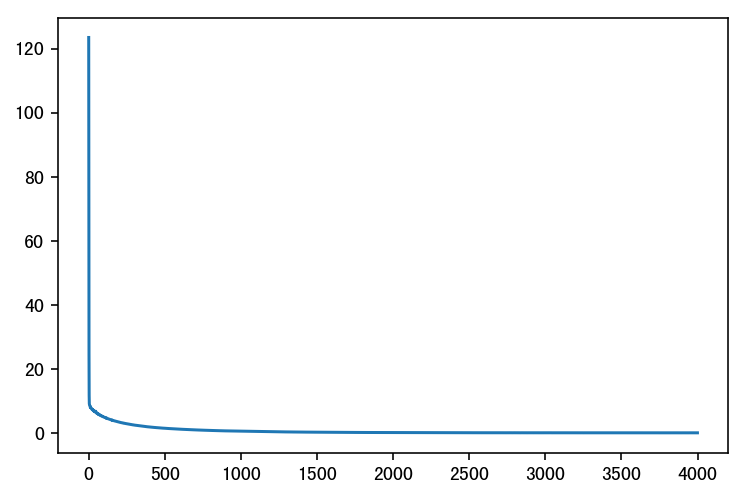

In [229]:
plt.plot(error.history['loss'])


In [232]:
error = model.fit(x_scaled,y_train,
                  batch_size=8,validation_split=0.1,
                  validation_steps=None,epochs=1000,verbose=1)

Train on 1314 samples, validate on 146 samples
Epoch 1/1000
1314/1314 [==============================] - 0s 160us/step - loss: 0.1139 - val_loss: 0.1132
Epoch 2/1000
1314/1314 [==============================] - 0s 139us/step - loss: 0.1160 - val_loss: 0.1134
Epoch 3/1000
1314/1314 [==============================] - 0s 139us/step - loss: 0.1151 - val_loss: 0.1132
Epoch 4/1000
1314/1314 [==============================] - 0s 134us/step - loss: 0.1175 - val_loss: 0.1132
Epoch 5/1000
1314/1314 [==============================] - 0s 137us/step - loss: 0.1178 - val_loss: 0.1132
Epoch 6/1000
1314/1314 [==============================] - 0s 147us/step - loss: 0.1135 - val_loss: 0.1132
Epoch 7/1000
1314/1314 [==============================] - 0s 137us/step - loss: 0.1167 - val_loss: 0.1133
Epoch 8/1000
1314/1314 [==============================] - 0s 134us/step - loss: 0.1176 - val_loss: 0.1132
Epoch 9/1000
1314/1314 [==============================] - 0s 136us/step - loss: 0.1193 - val_loss: 0.1133

1314/1314 [==============================] - 0s 154us/step - loss: 0.1144 - val_loss: 0.1129
Epoch 78/1000
1314/1314 [==============================] - 0s 168us/step - loss: 0.1147 - val_loss: 0.1129
Epoch 79/1000
1314/1314 [==============================] - 0s 161us/step - loss: 0.1148 - val_loss: 0.1129
Epoch 80/1000
1314/1314 [==============================] - 0s 151us/step - loss: 0.1180 - val_loss: 0.1129
Epoch 81/1000
1314/1314 [==============================] - 0s 146us/step - loss: 0.1128 - val_loss: 0.1128
Epoch 82/1000
1314/1314 [==============================] - 0s 149us/step - loss: 0.1145 - val_loss: 0.1128
Epoch 83/1000
1314/1314 [==============================] - 0s 164us/step - loss: 0.1161 - val_loss: 0.1130
Epoch 84/1000
1314/1314 [==============================] - 0s 139us/step - loss: 0.1138 - val_loss: 0.1129
Epoch 85/1000
1314/1314 [==============================] - 0s 136us/step - loss: 0.1135 - val_loss: 0.1130
Epoch 86/1000
1314/1314 [==========================

1314/1314 [==============================] - 0s 135us/step - loss: 0.1161 - val_loss: 0.1126
Epoch 154/1000
1314/1314 [==============================] - 0s 127us/step - loss: 0.1171 - val_loss: 0.1126
Epoch 155/1000
1314/1314 [==============================] - 0s 128us/step - loss: 0.1156 - val_loss: 0.1126
Epoch 156/1000
1314/1314 [==============================] - 0s 120us/step - loss: 0.1164 - val_loss: 0.1125
Epoch 157/1000
1314/1314 [==============================] - 0s 123us/step - loss: 0.1144 - val_loss: 0.1125
Epoch 158/1000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1122 - val_loss: 0.1124
Epoch 159/1000
1314/1314 [==============================] - 0s 127us/step - loss: 0.1152 - val_loss: 0.1126
Epoch 160/1000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1148 - val_loss: 0.1126
Epoch 161/1000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1126 - val_loss: 0.1125
Epoch 162/1000
1314/1314 [=================

Epoch 229/1000
1314/1314 [==============================] - 0s 134us/step - loss: 0.1154 - val_loss: 0.1123
Epoch 230/1000
1314/1314 [==============================] - 0s 123us/step - loss: 0.1205 - val_loss: 0.1123
Epoch 231/1000
1314/1314 [==============================] - 0s 126us/step - loss: 0.1142 - val_loss: 0.1122
Epoch 232/1000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1150 - val_loss: 0.1123
Epoch 233/1000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1135 - val_loss: 0.1123
Epoch 234/1000
1314/1314 [==============================] - 0s 129us/step - loss: 0.1142 - val_loss: 0.1122
Epoch 235/1000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1163 - val_loss: 0.1122
Epoch 236/1000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1166 - val_loss: 0.1122
Epoch 237/1000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1185 - val_loss: 0.1123
Epoch 238/1000
1314/1314 [==

Epoch 305/1000
1314/1314 [==============================] - 0s 144us/step - loss: 0.1120 - val_loss: 0.1118
Epoch 306/1000
1314/1314 [==============================] - 0s 131us/step - loss: 0.1129 - val_loss: 0.1119
Epoch 307/1000
1314/1314 [==============================] - 0s 132us/step - loss: 0.1169 - val_loss: 0.1119
Epoch 308/1000
1314/1314 [==============================] - 0s 140us/step - loss: 0.1157 - val_loss: 0.1119
Epoch 309/1000
1314/1314 [==============================] - 0s 138us/step - loss: 0.1156 - val_loss: 0.1119
Epoch 310/1000
1314/1314 [==============================] - 0s 133us/step - loss: 0.1130 - val_loss: 0.1119
Epoch 311/1000
1314/1314 [==============================] - 0s 130us/step - loss: 0.1156 - val_loss: 0.1119
Epoch 312/1000
1314/1314 [==============================] - 0s 133us/step - loss: 0.1148 - val_loss: 0.1119
Epoch 313/1000
1314/1314 [==============================] - 0s 130us/step - loss: 0.1160 - val_loss: 0.1118
Epoch 314/1000
1314/1314 [==

Epoch 381/1000
1314/1314 [==============================] - 0s 126us/step - loss: 0.1140 - val_loss: 0.1116
Epoch 382/1000
1314/1314 [==============================] - 0s 129us/step - loss: 0.1159 - val_loss: 0.1116
Epoch 383/1000
1314/1314 [==============================] - 0s 141us/step - loss: 0.1166 - val_loss: 0.1117
Epoch 384/1000
1314/1314 [==============================] - 0s 136us/step - loss: 0.1120 - val_loss: 0.1119
Epoch 385/1000
1314/1314 [==============================] - 0s 137us/step - loss: 0.1128 - val_loss: 0.1116
Epoch 386/1000
1314/1314 [==============================] - 0s 132us/step - loss: 0.1119 - val_loss: 0.1117
Epoch 387/1000
1314/1314 [==============================] - 0s 151us/step - loss: 0.1145 - val_loss: 0.1116
Epoch 388/1000
1314/1314 [==============================] - 0s 139us/step - loss: 0.1138 - val_loss: 0.1116
Epoch 389/1000
1314/1314 [==============================] - 0s 138us/step - loss: 0.1141 - val_loss: 0.1117
Epoch 390/1000
1314/1314 [==

Epoch 457/1000
1314/1314 [==============================] - 0s 152us/step - loss: 0.1150 - val_loss: 0.1113
Epoch 458/1000
1314/1314 [==============================] - 0s 129us/step - loss: 0.1147 - val_loss: 0.1113
Epoch 459/1000
1314/1314 [==============================] - 0s 132us/step - loss: 0.1176 - val_loss: 0.1117
Epoch 460/1000
1314/1314 [==============================] - 0s 133us/step - loss: 0.1126 - val_loss: 0.1115
Epoch 461/1000
1314/1314 [==============================] - 0s 136us/step - loss: 0.1135 - val_loss: 0.1114
Epoch 462/1000
1314/1314 [==============================] - 0s 131us/step - loss: 0.1140 - val_loss: 0.1114
Epoch 463/1000
1314/1314 [==============================] - 0s 135us/step - loss: 0.1154 - val_loss: 0.1114
Epoch 464/1000
1314/1314 [==============================] - 0s 151us/step - loss: 0.1123 - val_loss: 0.1113
Epoch 465/1000
1314/1314 [==============================] - 0s 156us/step - loss: 0.1192 - val_loss: 0.1113
Epoch 466/1000
1314/1314 [==

Epoch 533/1000
1314/1314 [==============================] - 0s 152us/step - loss: 0.1132 - val_loss: 0.1111
Epoch 534/1000
1314/1314 [==============================] - 0s 154us/step - loss: 0.1143 - val_loss: 0.1112
Epoch 535/1000
1314/1314 [==============================] - 0s 146us/step - loss: 0.1120 - val_loss: 0.1113
Epoch 536/1000
1314/1314 [==============================] - 0s 133us/step - loss: 0.1136 - val_loss: 0.1111
Epoch 537/1000
1314/1314 [==============================] - 0s 131us/step - loss: 0.1172 - val_loss: 0.1111
Epoch 538/1000
1314/1314 [==============================] - 0s 132us/step - loss: 0.1125 - val_loss: 0.1111
Epoch 539/1000
1314/1314 [==============================] - 0s 134us/step - loss: 0.1128 - val_loss: 0.1111
Epoch 540/1000
1314/1314 [==============================] - 0s 131us/step - loss: 0.1126 - val_loss: 0.1111
Epoch 541/1000
1314/1314 [==============================] - 0s 129us/step - loss: 0.1130 - val_loss: 0.1111
Epoch 542/1000
1314/1314 [==

Epoch 609/1000
1314/1314 [==============================] - 0s 128us/step - loss: 0.1130 - val_loss: 0.1108
Epoch 610/1000
1314/1314 [==============================] - 0s 129us/step - loss: 0.1122 - val_loss: 0.1108
Epoch 611/1000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1131 - val_loss: 0.1108
Epoch 612/1000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1143 - val_loss: 0.1109
Epoch 613/1000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1101 - val_loss: 0.1107
Epoch 614/1000
1314/1314 [==============================] - 0s 123us/step - loss: 0.1120 - val_loss: 0.1107
Epoch 615/1000
1314/1314 [==============================] - 0s 129us/step - loss: 0.1142 - val_loss: 0.1107
Epoch 616/1000
1314/1314 [==============================] - 0s 129us/step - loss: 0.1141 - val_loss: 0.1113
Epoch 617/1000
1314/1314 [==============================] - 0s 121us/step - loss: 0.1147 - val_loss: 0.1110
Epoch 618/1000
1314/1314 [==

Epoch 685/1000
1314/1314 [==============================] - 0s 141us/step - loss: 0.1140 - val_loss: 0.1106
Epoch 686/1000
1314/1314 [==============================] - 0s 129us/step - loss: 0.1136 - val_loss: 0.1106
Epoch 687/1000
1314/1314 [==============================] - 0s 126us/step - loss: 0.1107 - val_loss: 0.1107
Epoch 688/1000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1164 - val_loss: 0.1108
Epoch 689/1000
1314/1314 [==============================] - 0s 123us/step - loss: 0.1148 - val_loss: 0.1108
Epoch 690/1000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1124 - val_loss: 0.1106
Epoch 691/1000
1314/1314 [==============================] - 0s 123us/step - loss: 0.1129 - val_loss: 0.1106
Epoch 692/1000
1314/1314 [==============================] - 0s 127us/step - loss: 0.1140 - val_loss: 0.1105
Epoch 693/1000
1314/1314 [==============================] - 0s 130us/step - loss: 0.1110 - val_loss: 0.1105
Epoch 694/1000
1314/1314 [==

Epoch 761/1000
1314/1314 [==============================] - 0s 131us/step - loss: 0.1149 - val_loss: 0.1105
Epoch 762/1000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1144 - val_loss: 0.1106
Epoch 763/1000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1153 - val_loss: 0.1104
Epoch 764/1000
1314/1314 [==============================] - 0s 126us/step - loss: 0.1122 - val_loss: 0.1103
Epoch 765/1000
1314/1314 [==============================] - 0s 126us/step - loss: 0.1126 - val_loss: 0.1104
Epoch 766/1000
1314/1314 [==============================] - 0s 123us/step - loss: 0.1119 - val_loss: 0.1104
Epoch 767/1000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1134 - val_loss: 0.1104
Epoch 768/1000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1099 - val_loss: 0.1104
Epoch 769/1000
1314/1314 [==============================] - 0s 123us/step - loss: 0.1145 - val_loss: 0.1103
Epoch 770/1000
1314/1314 [==

Epoch 837/1000
1314/1314 [==============================] - 0s 139us/step - loss: 0.1151 - val_loss: 0.1102
Epoch 838/1000
1314/1314 [==============================] - 0s 149us/step - loss: 0.1112 - val_loss: 0.1101
Epoch 839/1000
1314/1314 [==============================] - 0s 127us/step - loss: 0.1130 - val_loss: 0.1100
Epoch 840/1000
1314/1314 [==============================] - 0s 151us/step - loss: 0.1110 - val_loss: 0.1103
Epoch 841/1000
1314/1314 [==============================] - 0s 166us/step - loss: 0.1122 - val_loss: 0.1101
Epoch 842/1000
1314/1314 [==============================] - 0s 159us/step - loss: 0.1134 - val_loss: 0.1101
Epoch 843/1000
1314/1314 [==============================] - 0s 158us/step - loss: 0.1130 - val_loss: 0.1100
Epoch 844/1000
1314/1314 [==============================] - 0s 164us/step - loss: 0.1144 - val_loss: 0.1100
Epoch 845/1000
1314/1314 [==============================] - 0s 152us/step - loss: 0.1155 - val_loss: 0.1101
Epoch 846/1000
1314/1314 [==

Epoch 913/1000
1314/1314 [==============================] - 0s 129us/step - loss: 0.1128 - val_loss: 0.1099
Epoch 914/1000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1154 - val_loss: 0.1099
Epoch 915/1000
1314/1314 [==============================] - 0s 123us/step - loss: 0.1106 - val_loss: 0.1099
Epoch 916/1000
1314/1314 [==============================] - 0s 129us/step - loss: 0.1135 - val_loss: 0.1099
Epoch 917/1000
1314/1314 [==============================] - 0s 130us/step - loss: 0.1108 - val_loss: 0.1099
Epoch 918/1000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1111 - val_loss: 0.1099
Epoch 919/1000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1122 - val_loss: 0.1098
Epoch 920/1000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1132 - val_loss: 0.1099
Epoch 921/1000
1314/1314 [==============================] - 0s 166us/step - loss: 0.1114 - val_loss: 0.1098
Epoch 922/1000
1314/1314 [==

Epoch 989/1000
1314/1314 [==============================] - 0s 127us/step - loss: 0.1099 - val_loss: 0.1096
Epoch 990/1000
1314/1314 [==============================] - 0s 128us/step - loss: 0.1116 - val_loss: 0.1097
Epoch 991/1000
1314/1314 [==============================] - 0s 126us/step - loss: 0.1154 - val_loss: 0.1099
Epoch 992/1000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1121 - val_loss: 0.1098
Epoch 993/1000
1314/1314 [==============================] - 0s 125us/step - loss: 0.1092 - val_loss: 0.1097
Epoch 994/1000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1136 - val_loss: 0.1096
Epoch 995/1000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1163 - val_loss: 0.1096
Epoch 996/1000
1314/1314 [==============================] - 0s 124us/step - loss: 0.1142 - val_loss: 0.1097
Epoch 997/1000
1314/1314 [==============================] - 0s 122us/step - loss: 0.1162 - val_loss: 0.1097
Epoch 998/1000
1314/1314 [==

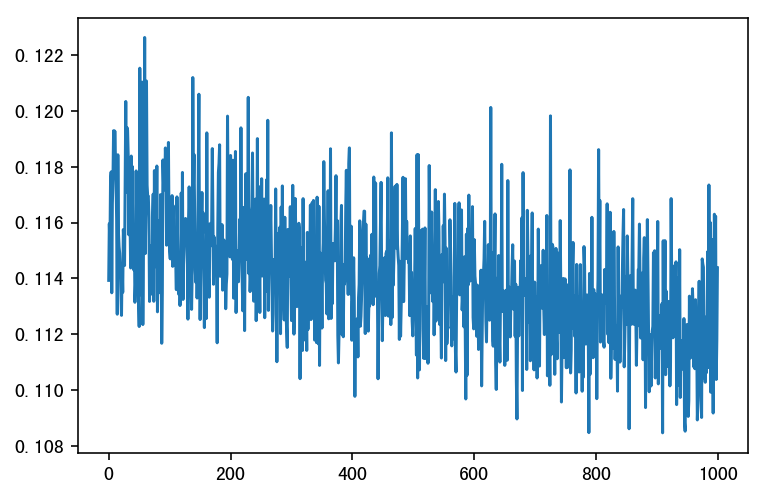

In [233]:
plt.plot(error.history['loss'])


In [234]:
y_predict = model.predict(x_scaled)
metrics.mean_absolute_error(np.exp(y_train),np.exp(y_predict))

13829.071872324486

In [235]:
metrics.mean_absolute_error(y_train, y_predict)

0.077484478828811584

In [237]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = np.exp(model.predict(std_x.transform(test.values)))
sub.to_csv('submission_nn.csv',index=False)